In [26]:
#Question 4: Use Webscraping to Extract GME Revenue Data

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

req = requests.get(url)

print(req)

<Response [200]>


In [27]:
soup = BeautifulSoup(req.text, "html.parser")

whole = soup.find("div", id = "style-1")

table = whole.find_all("table", class_="historical_data_table table")[1]

rows = table.find_all("tr")

print(table)

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">GameStop Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2020-04-30</td>
<td style="text-align:center">$1,021</td>
</tr>
<tr>
<td style="text-align:center">2020-01-31</td>
<td style="text-align:center">$2,194</td>
</tr>
<tr>
<td style="text-align:center">2019-10-31</td>
<td style="text-align:center">$1,439</td>
</tr>
<tr>
<td style="text-align:center">2019-07-31</td>
<td style="text-align:center">$1,286</td>
</tr>
<tr>
<td style="text-align:center">2019-04-30</td>
<td style="text-align:center">$1,548</td>
</tr>
<tr>
<td style="text-align:center">2019-01-31</td>
<td style="text-align:center">$3,063</td>
</tr>
<tr>
<td style="text-align:center">2018-10-31</td>
<td style="text-align:center">$1,935</td>
</tr>
<tr>
<td style="text-align:center">2018-07-31</td>
<td style="text-align:center">$1,501</td>


In [28]:
headers_list= ["Date", "Revenue"]

print(headers_list)

df = pd.DataFrame(columns=headers_list)

['Date', 'Revenue']


In [29]:
row_list = []

for i in rows[1:]:
    data = i.find_all("td")
    rows = [tr.text for tr in data]
    
    l = len(df)
    df.loc[l] = rows
print(df)   

          Date Revenue
0   2020-04-30  $1,021
1   2020-01-31  $2,194
2   2019-10-31  $1,439
3   2019-07-31  $1,286
4   2019-04-30  $1,548
..         ...     ...
57  2006-01-31  $1,667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709

[62 rows x 2 columns]


In [30]:
df.to_excel("C:\\Users\\Shivam\\Desktop\\GME.xlsx")
df.tail()

,Date,Revenue
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


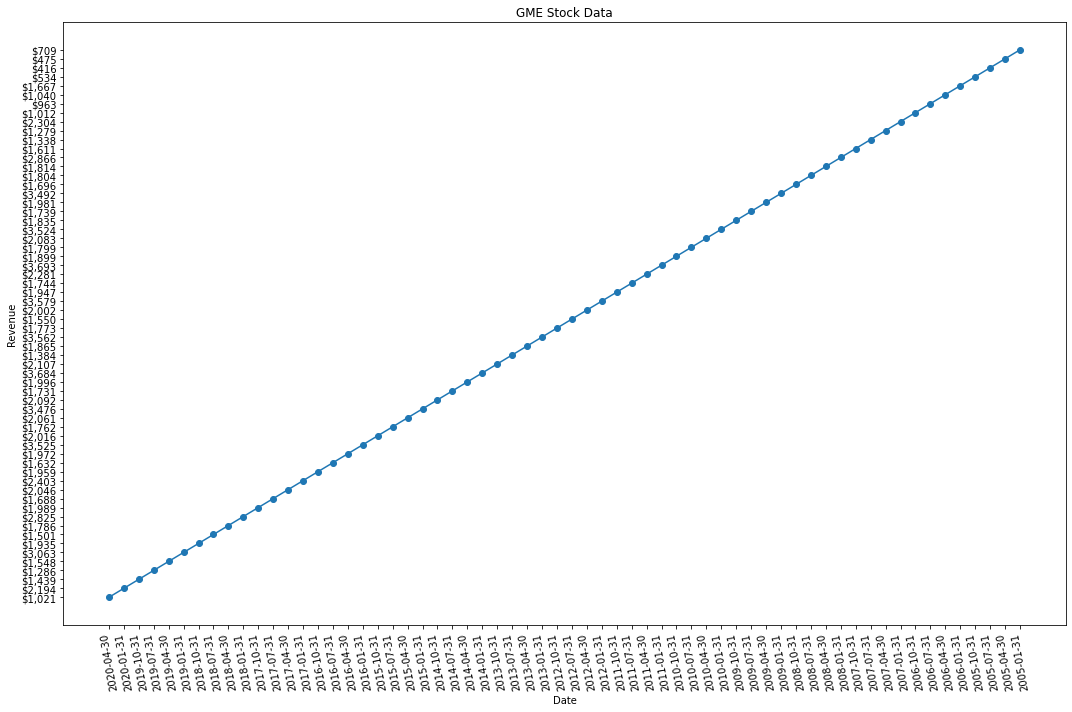

In [31]:
def make_graph(data, revenue, title):
    plt.figure(figsize=(15, 10))
    plt.plot(data, revenue, marker='o', linestyle='-')
    plt.title(title + ' Stock Data')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.xticks(rotation=100)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    
make_graph(df['Date'], df['Revenue'], 'GME')